## Master Mathematics Appliquées, Statistique - Parcours Data Science.
## Course Applied mathematics
## TP. Introduction to the library optimize of Scipy.
## Frédéric Richard, AMU, 2024


### 0. Library used in this TP.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

### 1. Introduction.

### 1.1. Context and goal.

The educational goal of the project is to learn how to manipulate methods of the module optimize from the scientific computing package Scipy, and apply them to real-world examples. The examined methods include *lsq_linear*, and *least_squares*. These methods will be applied in the context of a climate study for the trend analysis of a time serie of temperature changes over the recent years.

### 1.2. Data.

Data are downloaded from the Kaggle website [Climate change Indicators](https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators/data). They contain the surface temperature changes from 1962 to 2022 for each country. Below, some information are shown about the dataset.

In [3]:
# Load the dataset.
climate_data = pd.read_csv('climate_change_indicators.csv')

# Information about variables.
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

One of the dataset entries gives the evolution of temperatures on average for all the countries. This entries can be selected and plotted as follows. 

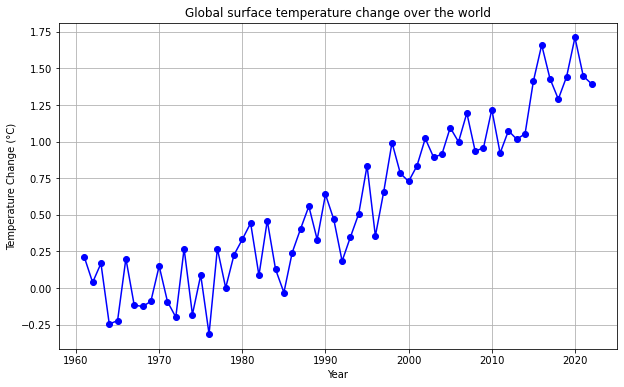

In [4]:
# Filter data for the "World".
world_data = climate_data[climate_data['Country'] == 'World']

# Select temperature columns.
year_columns = [col for col in world_data.columns if col.startswith('F') and col[1:].isdigit()]
years = np.array([int(col[1:]) for col in year_columns])

# Extract years and corresponding temperature values
temperatures = np.array(world_data[year_columns].values.flatten())

# Plotting the global temperature trend
plt.figure(figsize=(10, 6))
plt.plot(years, temperatures, marker='o', linestyle='-', color='b')
plt.title('Global surface temperature change over the world')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()

In this practical session, we study the trend of the evolution of world temperature changes by fitting trend model to this data. The fitting procedure will be set using the optimization methods of the scipy package. 

### 2. Trend fitting.

### 2.1. The fitting issue.

In the time serie, temperatures are observed every year, from 1962 to 2022. Let $n=61$ be the number of observation years. For $i$ varying $[\![1, n]\!]$, let $t_i = 1961 + i$ denote the ith year of observation, and $y_i$ the temperature at the ith year. 

We assume that the observation can be modeled as

$$ y_i =  M_\theta(t_i) + \varepsilon_i, i \in [\![1,n]\!], $$ 

where
- $M_\theta$ is some parametric function representing a trend, 
- and the $\varepsilon_i$ are centered Gaussian random variables representing variations around the trend. 

The goal is to find a value of $\theta$ for which the function $F_\theta$ "matches" the data. This is formulated in terms of minimizing a least square criterion of the form

$$ \mathcal{C}(\theta) =  \frac{1}{2} \sum_{i=0}^{n} \left(  y_i - M_\theta(t_i) \right)^2, $$

over a set $\Theta$ of possible parameter values. 

This minimization problem takes different forms depending on the choice of the parametric model.

### 2.2. Fitting polynomial trends.

As a first example of fitting, we choose $M_\theta$ to be linear, and write
$$ M_\theta(t) = \theta_0 + \theta_1 \: t. $$

Thus the fitting problem amounts to the miminization of least square criterion

\begin{equation} \label{eqn:linear_lsq}
\mathcal{C}_0(\theta) = \frac{1}{2} \sum_{i=0}^{n} \left(  y_i - \theta_0  - \theta_1 t_i \right)^2,
\end{equation}

for $\theta = (\theta_0, \theta_1)$ varying in $\mathbb{R}^2$.

The solution of this problem can be numerically approximated using the method [lsq_linear](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.lsq_linear.html) from the package scipy.optimize. As explained in the manual, the method is devoted the minimization of so-called linear least square problem of the form 

$$ \mathbf{C}_0(x) = \frac{1}{2} \left\vert A x - b \right\vert^2,  $$

where 

- $A$ stands for a matrix of size $n \times p$, and $b$ for a vector of size $p$, 
- $x$ is a variable in $\mathbb{R}^p$ which may be submitted to some constraints,
- $\vert \cdot \vert$ is the Euclidean norm on $\mathbb{R}^p$.

**Exercise 1**

1. Express $\mathcal{C}_0$ in the matricial form of the criterion $\mathbf{C}_0$.
2. Apply *lsq_linear* to mininimize $\mathcal{C}_0$.
3. Print the obtained minimum and the minimizer.
4. On a same graphic, overlay the observation and the values of prediction obtained with the model.

1 : $ C_0(\theta) = \frac{1}{2} \sum_{i=1}^n (y_i - \mathbf{M_\theta}(t_i))^2 = \frac{1}{2} \sum_{i=1}^n (y_i - \theta_0 - \theta_1 t_i)^2 = \frac{1}{2} \| \mathbf{A} \mathbf{x} - \mathbf{b} \|^2 $ où $ \mathbf{A} = \begin{bmatrix} 1 & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & t_n \end{bmatrix} $, $ \mathbf{x} = [\theta_0, \theta_1]^T $ et $ \mathbf{b} = [y_1, \ldots, y_n]^T $

Paramètres optimaux : θ0 = -55.0439, θ1 = 0.0279
Valeur minimale du critère C0 : 1.2540


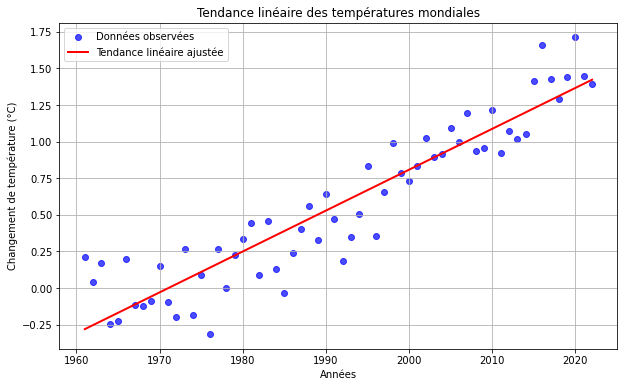

In [5]:
t = years   
y = temperatures 

n = len(t)
A_lin = np.vstack((np.ones(n), t)).T
b = y  

result_lin = optim.lsq_linear(A_lin, b)

theta0_lin, theta1_lin = result_lin.x

y_pred_lin = theta0_lin + theta1_lin * t

print(f"Paramètres optimaux : θ0 = {theta0_lin:.4f}, θ1 = {theta1_lin:.4f}")
print(f"Valeur minimale du critère C0 : {result_lin.cost:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(t, y, label="Données observées", color="blue", alpha=0.7)
plt.plot(t, y_pred_lin, label="Tendance linéaire ajustée", color="red", linewidth=2)
plt.xlabel("Années")
plt.ylabel("Changement de température (°C)")
plt.title("Tendance linéaire des températures mondiales")
plt.legend()
plt.grid(True)
plt.show()


**Exercise 2**

1. Extend the previous trend estimation to the fitting of a second-order polynomial trend of the form

$$ M_\theta(t) = \theta_0 + \theta_1 t + \theta_2 t^2. $$

2. Apply the method *lsq_linear* to fit the observations.
3. Compare the obtained fitting with the previous one in terms of minimum. 

1 : On a désormais : $ C_0(\theta) = \frac{1}{2} \| \mathbf{A} \mathbf{x} - \mathbf{b} \|^2 $ où $ \mathbf{A} = \begin{bmatrix} 1 & t_1 & t_1^{2}\\ 1 & t_2 & t_2^{2} \\ \vdots & \vdots & \vdots \\ 1 & t_n & t_n^{2} \end{bmatrix} $, $ \mathbf{x} = [\theta_0, \theta_1, \theta_2]^T $ et $ \mathbf{b} = [y_1, \ldots, y_n]^T $.

Paramètres optimaux : θ0 = 1173.7303, θ1 = -1.2062, θ2 = 0.0003
Valeur minimale du critère C0 : 1.0100


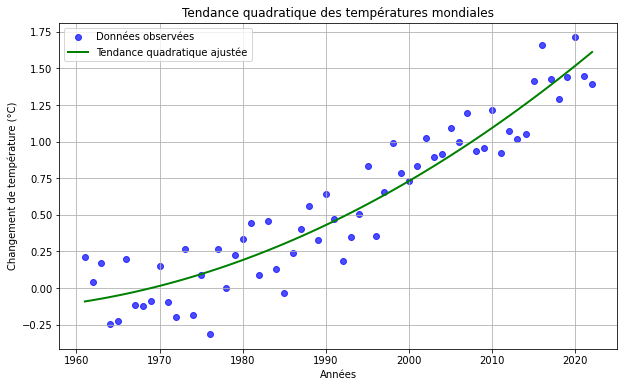

In [7]:
A_quad = np.vstack((np.ones(n), t, t**2)).T

result_quad = optim.lsq_linear(A_quad, b)

theta0_quad, theta1_quad, theta2_quad = result_quad.x

y_pred_quad = theta0_quad + theta1_quad * t + theta2_quad * t**2

print(f"Paramètres optimaux : θ0 = {theta0_quad:.4f}, θ1 = {theta1_quad:.4f}, θ2 = {theta2_quad:.4f}")
print(f"Valeur minimale du critère C0 : {result_quad.cost:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(t, y, label="Données observées", color="blue", alpha=0.7)
plt.plot(t, y_pred_quad, label="Tendance quadratique ajustée", color="green", linewidth=2)
plt.xlabel("Années")
plt.ylabel("Changement de température (°C)")
plt.title("Tendance quadratique des températures mondiales")
plt.legend()
plt.grid(True)
plt.show()

3 : La valeur de $ C_0 $ est plus faible pour le modèle quadratique (1.0100) que pour le modèle linéaire (1.2540). Cela indique que le modèle quadratique ajuste mieux les données car il minimise davantage l'erreur quadratique moyenne.

### 2.3. Non linear fitting.

In a second approach, we propose to fit the observations with an exponential model of the form

$$ M_\theta(t) = \theta_0 + \theta_1 \exp(\theta_2 t). $$

Thus, we shall minimize a criterion of the form
$$ \mathcal{C}_1(\theta) = \frac{1}{2} \sum_{i=1}^n (y_i -  \theta_0 - \theta_1 \exp(\theta_2 t_i) )^2,  $$
for $\theta = (\theta_0, \theta_1, \theta_2)$ varying in $\mathbb{R}^3$.

For that, we use the method [least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) of scipy.optimize. As mentioned in the manual, this method enables to minimize a non-linear least square criterion of the form

$$ \mathbf{C}_1(\theta) = \frac{1}{2} \sum_{i=1}^n (\epsilon_i(\theta))^2,  $$

where $\epsilon_n(\theta)$ are some residuals that have to be defined by the user.To apply the method *least_square* to our problem, we should set

$$ \epsilon_i(\theta) = y_i -  \theta_0 - \theta_1 \exp(\theta_2 t_i). $$

**Exercise 3**

1. Compute mathematically the jacobian matrix of the function:

$$ \begin{array}{cccc} 
\epsilon & \mathbb{R}^3 & \rightarrow  & \mathbb{R}^n \\
& \theta & \rightarrow & (\epsilon_1(\theta), \cdots, \epsilon_n(\theta)).
\end{array} $$

2. Following the templates below, write three numpy functions that returns
    - the value of the exponential model at given times $t$,
    - the residual of the exponential model at given times $t$,
    - the jacobian of the residuals of the exponential model at given times $t$. 

1 :  $ J_{i,j} = \frac{\partial \epsilon_i}{\partial \theta_j} $

On calcule les dérivées partielles :

$ \frac{\partial \epsilon_i}{\partial \theta_0} = \frac{\partial}{\partial \theta_0} \big( y_i - \theta_0 - \theta_1 \exp(\theta_2 t_i) \big) = -1 $

$ \frac{\partial \epsilon_i}{\partial \theta_1} = \frac{\partial}{\partial \theta_1} \big( y_i - \theta_0 - \theta_1 \exp(\theta_2 t_i) \big) = -\exp(\theta_2 t_i) $

$ \frac{\partial \epsilon_i}{\partial \theta_2} = \frac{\partial}{\partial \theta_2} \big( y_i - \theta_0 - \theta_1 \exp(\theta_2 t_i) \big) = -\theta_1 t_i \exp(\theta_2 t_i) $

On a donc :

$ J(\theta) = \begin{bmatrix} -1 & -\exp(\theta_2 t_1) & -\theta_1 t_1 \exp(\theta_2 t_1) \\ -1 & -\exp(\theta_2 t_2) & -\theta_1 t_2 \exp(\theta_2 t_2) \\ \vdots & \vdots & \vdots \\ -1 & -\exp(\theta_2 t_n) & -\theta_1 t_n \exp(\theta_2 t_n) \end{bmatrix} $

In [8]:
def exponential_model(theta, t):
    """Exponential model.

    Parameters
    ----------
    theta : array
        Model parameters
    t : array
        Observation times.

    Returns
    -------
       Values of the exponential model at times t.
    """
    theta0, theta1, theta2 = theta
    return theta0 + theta1 * np.exp(theta2 * t)


def res_exponential_model(theta, t, w):
    """Residual of the exponential fitting.

    Parameters
    ----------
    theta : array
        Model parameters
    t : array
        Observation points.
    w: array
        Observation values.

    Returns
    -------
        Residuals at times t.
    """
    return w - exponential_model(theta, t)


def jac_res_exponential_model(theta, t, w):
    """Jacobian of residual of the exponential fitting.
    Parameters
    ----------
    theta : array
        Model parameters
    t : array
        Observation points.
    w: array
        Observation values.

    Returns
    -------
        The jacobian matrix of residuals at times t.
    """
    theta0, theta1, theta2 = theta
    exp_term = np.exp(theta2 * t)

    jacobian = np.zeros((len (t), 3))
    jacobian[:, 0] = -1  
    jacobian[:, 1] = -exp_term  
    jacobian[:, 2] = -theta1 * t * exp_term  

    return jacobian


**Exercise 4**

1. Using the function above, apply the method *least_square* to fit observations with an exponential model. 
2. Compare the predictions to those obtained by polynomial fittings.

Paramètres optimaux : θ0 = -0.8917, θ1 = 0.7572, θ2 = 0.0196
Valeur minimale du critère C1 : 1.0388


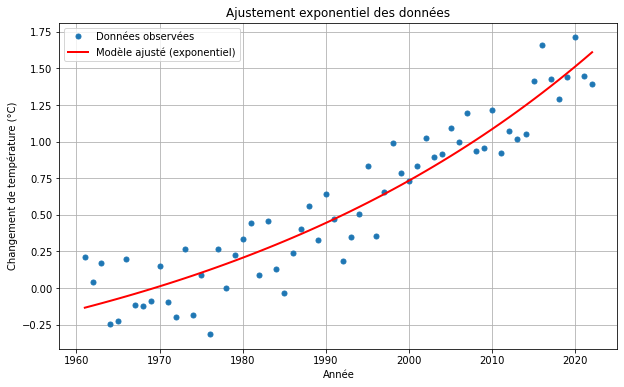

In [9]:
t_exp = years - years [0] # Temps relatif (année - année initiale) afin d'éviter un dépassement de valeurs de exp
w = temperatures

# Nouvelle approximation quadratique basée sur t = years - years [0] afin d'estimer les valeurs initiales
A_quad2 = np.vstack((np.ones(n), t_exp, t_exp**2)).T

result_quad2 = optim.lsq_linear(A_quad2, b)

theta0_quad2, theta1_quad2, theta2_quad2 = result_quad2.x

initial_guess = [theta0_quad2, theta1_quad2, theta2_quad2] 

result_exp = optim.least_squares(
    fun=res_exponential_model,
    x0=initial_guess,
    jac=jac_res_exponential_model,
    args=(t_exp, w),
)

theta0_exp, theta1_exp, theta2_exp = result_exp.x
residuals_min = result_exp.cost
print(f"Paramètres optimaux : θ0 = {theta0_exp:.4f}, θ1 = {theta1_exp:.4f}, θ2 = {theta2_exp:.4f}")
print(f"Valeur minimale du critère C1 : {residuals_min:.4f}")

fitted_model = exponential_model(result_exp.x, t_exp)

plt.figure(figsize=(10, 6))
plt.plot(years, w, 'o', label="Données observées", markersize=5)
plt.plot(years, fitted_model, '-', label="Modèle ajusté (exponentiel)", color='red', linewidth=2)
plt.title("Ajustement exponentiel des données")
plt.xlabel("Année")
plt.ylabel("Changement de température (°C)")
plt.legend()
plt.grid(True)
plt.show()

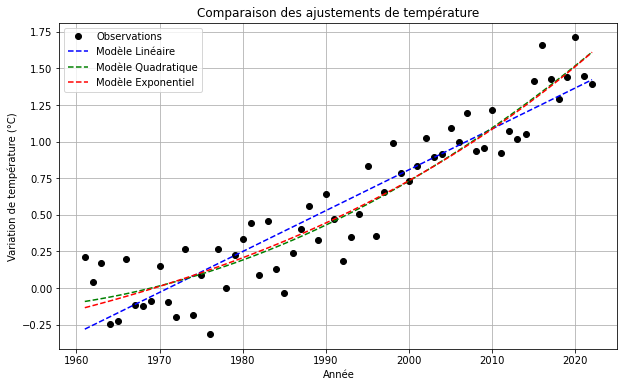

In [84]:
linear_predictions = theta0_lin + theta1_lin * t
quadratic_predictions = theta0_quad + theta1_quad * t + theta2_quad * t**2
exponential_predictions = theta0_exp + theta1_exp * np.exp(theta2_exp * t_exp)

plt.figure(figsize=(10, 6))

plt.plot(years, temperatures, 'o', label='Observations', color='black')

plt.plot(years, linear_predictions, label='Modèle Linéaire', color='blue', linestyle='--')
plt.plot(years, quadratic_predictions, label='Modèle Quadratique', color='green', linestyle='--')
plt.plot(years, exponential_predictions, label='Modèle Exponentiel', color='red', linestyle='--')

plt.title('Comparaison des ajustements de température')
plt.xlabel('Année')
plt.ylabel('Variation de température (°C)')
plt.legend()
plt.grid(True)
plt.show()

2 : On remarque que les approximations quadratiques et exponentielles estiment plutôt bien les observations et sont assez similaires. L'approximation linéaire est elle moins précise. En comparant les valeurs minimales des critères, on remarque que l'approximation linéaire ($ C_0 = 1.2540 $) est effectivement moins précise et que l'approximation quadratique ($ C_0 = 1.0100 $) est légèrement plus précise que l'exponentielle ($ C_1 = 1.0388 $).